In [37]:
#importing required libraries
import numpy as np
from matplotlib import pyplot as plt
import random

In [38]:
#defining sigmoid non-linearity and its derivative
def sig(x):
    return 1/(1+np.exp(-x))
def sig_der(y):
    return y*(1-y)

In [39]:
#function for splitting dataset into training and testing sets
def split_data(df,N):
    data = []
    train = np.empty((0,4),float)
    test = np.empty((0,4),float)
    for i in range(0,int(N)):
        train = np.append(train,np.array([df[i]]),axis=0)
    for i in range(int(N),T):
        test = np.append(test,np.array([df[i]]),axis=0)
    data.append(train)
    data.append(test)
    return data
    
#function for splitting training dataset into m mini-batches
def mini_batches(train_x,train_y,m):
    n = int(N/m)
    batch=[]
    batch_x = []        #contains the features x of the batches
    batch_y = []        #contains the labels y of the batches
    for i in range(n):
        temp = np.empty((0,3),float)
        temp1 = np.array([])
        for j in range(i*m,(i+1)*m):
            temp = np.append(temp,np.array([train_x[j]]),axis=0)
            temp1 = np.append(temp1,np.array([train_y[j]]),axis=0)
        batch_x.append(temp)
        batch_y.append(temp1)
    batch.append(batch_x)
    batch.append(batch_y)
    return batch
  
#function to calculate mean square error
def MSE(y,y_out):
    sum=0
    e = (y-y_out)
    for i in e:
        sum = sum + i*i
    return sum/len(y)
    

#function to predict label and our input consists of 2 elements (x1,x2) and a 1 to handle the bias term i.e., [x1 x2 1]
def predict(x,a1,a2,b):
    z1 = sig(np.dot(a1,x.T))
    z2 = sig(np.dot(a2,x.T))
    z = np.array([z1,z2,1])
    y_out = sig((np.dot(b.T,z.T)))
    return y_out

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

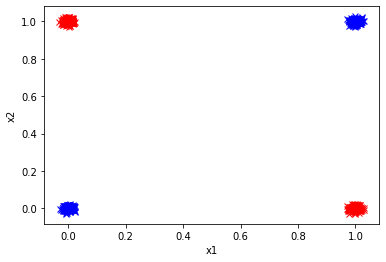

In [40]:
#(a) XOR

#Generating samples 

#(i)T=1000
T = 1000
# we will generate data by adding some gaussian noise around (1,1) (1,0) (0,0) (0,1)

N = int(0.8*T)
M = T-N

df = np.empty((4,0),float)
train = np.empty((4,0),float)
test = np.empty((4,0),float)

mean = np.array([[0,0],[0,1],[1,1],[1,0]])
cov = np.array([[0.0001,0],[0,0.0001]])
for i in range(4):
    temp = np.random.multivariate_normal(mean[i], cov, int(T/4)).T
    l = np.empty((int(T/4)),float)
    l.fill(mean[i][0]^mean[i][1])       #contains labels
    t = np.ones((int(T/4)),float)
    temp = np.append(temp,np.array([t]),axis=0)
    temp = np.append(temp,np.array([l]),axis=0)
    df = np.concatenate((df,temp),axis=1)
df = df.T
#plotting data points with label 1 in red color and label 0 in blue color
for i in range(T):
    if(df[i,3]==1):
        plt.plot(df[i,0], df[i,1],'rx')
    else:
        plt.plot(df[i,0], df[i,1],'bx')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#Splitting the dataset into training and testing samples
train = split_data(df,N)[0]
test = split_data(df,N)[1]

#separating features and labels x->features y->labels
train_x = np.array([train[:,0],train[:,1],train[:,2]]).T
train_y = train[:,3]

test_x = np.array([test[:,0],test[:,1],test[:,2]]).T
test_y = test[:,3]

#Splitting the training data into m 'mini-batches' 
m = 100
n = int(N/m)
batches = mini_batches(train_x,train_y,m)
batch_x = batches[0]            #this contains features of the individual element in each batch
batch_y = batches[1]            #this contains labels of the individual element in each batch

#intialising weights and biases
a1 = np.array([-6.34 ,-7.29  ,2.90 ])
a2 = np.array([-5.99 ,-5.40  , 8.48] )
b = np.array([-10.14 ,  9.92 , -4.90] )

#learning rate
g = 0.05

#no of epoches
epoches = 100

#lists to store testing losses and training losses after every epoch
train_loss=[]
test_loss=[]
ex=[]

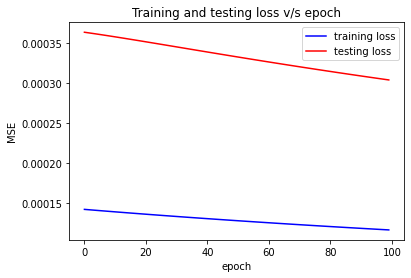

In [41]:
for e in range(epoches):
    for i in range(n):
        X = batch_x[i]
        Y = batch_y[i]

        grad_a1 = np.zeros((3,))
        grad_a2 = np.zeros((3,))
        grad_b = np.zeros((3,))

        for j in range(m):
            x = X[j]
            y = Y[j]
            #output at the hidden layer
            z0 = sig(float(np.dot(a1,x)))
            z1 = sig(float(np.dot(a2,x)))
            z = np.array([z0,z1,1]).T

            #y output
            y_out = sig(float(np.dot(b,z)))

            #delta
            d = -2*(y-y_out)*sig_der(y_out)

            #factors which are required in calculating gradient w.r.t a1 and a2
            s0 = d*b[0]*sig_der(z0)
            s1 = d*b[1]*sig_der(z1)

            #calculating gradients
            grad_b = np.add(grad_b,d*z)
            grad_a1 = np.add(grad_a1,s0*x)
            grad_a2 = np.add(grad_a2,s1*x)
        
        #updating weights using calculated gradients with respect to each vector.
        b = b-g*grad_b
        a1 = a1-g*grad_a1
        a2 = a2-g*grad_a2

    #calculating training and testing errors at the end of every epoch
    y_test_out = predict(test_x,a1,a2,b)
    y_train_out = predict(train_x,a1,a2,b)
    test_loss.append(MSE(test_y,y_test_out))
    train_loss.append(MSE(train_y[:],y_train_out))
    ex.append(e)
    
plt.plot(ex,train_loss,'b',label='training loss')
plt.plot(ex,test_loss,'r',label='testing loss')
plt.title('Training and testing loss v/s epoch')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [42]:
print('Parameters of the model are : \n')
print('a1 (weights and bias at hidden node 1) :')
print(a1,'\n')
print('a2 (weights and bias at hidden node 2) :')
print(a2,'\n')
print('b (weights and bias at output node) :')
print(b,'\n')
print('Few predictions of our model :')
print('XOR(1,0) : ',predict(np.array([1,0,1]),a1,a2,b))
print('XOR(0,0) : ',predict(np.array([0,0,1]),a1,a2,b))
print('XOR(0,1) : ',predict(np.array([0,1,1]),a1,a2,b))
print('XOR(1,1) : ',predict(np.array([1,1,1]),a1,a2,b))

Parameters of the model are : 

a1 (weights and bias at hidden node 1) :
[-6.38998999 -7.32641743  2.92672616] 

a2 (weights and bias at hidden node 2) :
[-6.0421377  -5.44200073  8.5511711 ] 

b (weights and bias at output node) :
[-10.34309457  10.11404717  -5.00174705] 

Few predictions of our model :
XOR(1,0) :  0.9826603554450053
XOR(0,0) :  0.008952562172344835
XOR(0,1) :  0.9895911691508676
XOR(1,1) :  0.011088260426883476


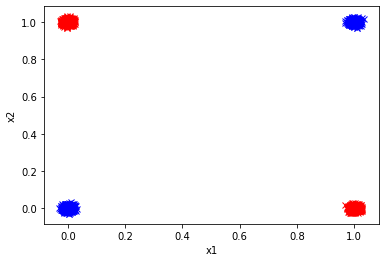

In [43]:
#(ii)T=2500
T = 2500
# we will generate data by adding some gaussian noise around (1,1) (1,0) (0,0) (0,1)

N = int(0.8*T)
M = T-N

df = np.empty((4,0),float)
train = np.empty((4,0),float)
test = np.empty((4,0),float)

mean = np.array([[0,0],[0,1],[1,1],[1,0]])
cov = np.array([[0.0001,0],[0,0.0001]])
for i in range(4):
    temp = np.random.multivariate_normal(mean[i], cov, int(T/4)).T
    l = np.empty((int(T/4)),float)
    l.fill(mean[i][0]^mean[i][1])
    t = np.ones((int(T/4)),float)
    temp = np.append(temp,np.array([t]),axis=0)
    temp = np.append(temp,np.array([l]),axis=0)
    df = np.concatenate((df,temp),axis=1)
df = df.T
#plotting data points with label 1 in red color and label 0 in blue color
for i in range(T):
    if(df[i,3]==1):
        plt.plot(df[i,0], df[i,1],'rx')
    else:
        plt.plot(df[i,0], df[i,1],'bx')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#Splitting the dataset into training and testing samples
train = split_data(df,N)[0]
test = split_data(df,N)[1]

#separating features and labels x->features y->labels
train_x = np.array([train[:,0],train[:,1],train[:,2]]).T
train_y = train[:,3]

test_x = np.array([test[:,0],test[:,1],test[:,2]]).T
test_y = test[:,3]

#Splitting the training data into m 'mini-batches' 
m = 100
n = int(N/m)
batches = mini_batches(train_x,train_y,m)
batch_x = batches[0]            #this contains features of the individual element in each batch
batch_y = batches[1]            #this contains labels of the individual element in each batch

#intialising weights and biases
a1 = np.array([-6.34 ,-7.29  ,2.90 ])
a2 = np.array([-5.99 ,-5.40  , 8.48] )
b = np.array([-10.14 ,  9.92 , -4.90] )
#learning rate
g = 0.05

#lists to store testing losses and training losses after every epoch
test_loss=[]
train_loss=[]
ex=[]
epoches=100

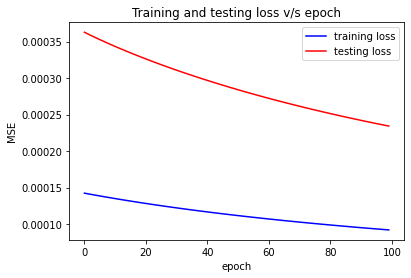

In [44]:
for e in range(epoches):
    for i in range(n):
        X = batch_x[i]
        Y = batch_y[i]

        grad_a1 = np.zeros((3,))
        grad_a2 = np.zeros((3,))
        grad_b = np.zeros((3,))

        for j in range(m):
            x = X[j]
            y = Y[j]
            #output at the hidden layer
            z0 = sig(float(np.dot(a1,x)))
            z1 = sig(float(np.dot(a2,x)))
            z = np.array([z0,z1,1]).T

            #y output
            y_out = sig(float(np.dot(b,z)))

            #delta
            d = -2*(y-y_out)*sig_der(y_out)

            #factors which are required in calculating gradient w.r.t a1 and a2
            s0 = d*b[0]*sig_der(z0)
            s1 = d*b[1]*sig_der(z1)

            #calculating gradients
            grad_b = np.add(grad_b,d*z)
            grad_a1 = np.add(grad_a1,s0*x)
            grad_a2 = np.add(grad_a2,s1*x)
        
        #updating weights using calculated gradients with respect to each vector.
        b = b-g*grad_b
        a1 = a1-g*grad_a1
        a2 = a2-g*grad_a2

    #calculating training and testing errors at the end of every epoch
    y_test_out = predict(test_x,a1,a2,b)
    y_train_out = predict(train_x,a1,a2,b)
    test_loss.append(MSE(test_y,y_test_out))
    train_loss.append(MSE(train_y[:],y_train_out))
    ex.append(e)
    
plt.plot(ex,train_loss,'b',label='training loss')
plt.plot(ex,test_loss,'r',label='testing loss')
plt.title('Training and testing loss v/s epoch')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [45]:
print('Parameters of the model are : \n')
print('a1 (weights and bias at hidden node 1) :')
print(a1,'\n')
print('a2 (weights and bias at hidden node 2) :')
print(a2,'\n')
print('b (weights and bias at output node) :')
print(b,'\n')
print('Few predictions of our model :')
print('XOR(1,0) : ',predict(np.array([1,0,1]),a1,a2,b))
print('XOR(0,0) : ',predict(np.array([0,0,1]),a1,a2,b))
print('XOR(0,1) : ',predict(np.array([0,1,1]),a1,a2,b))
print('XOR(1,1) : ',predict(np.array([1,1,1]),a1,a2,b))

Parameters of the model are : 

a1 (weights and bias at hidden node 1) :
[-6.44833425 -7.37051483  2.95613817] 

a2 (weights and bias at hidden node 2) :
[-6.09644839 -5.49776819  8.64240746] 

b (weights and bias at output node) :
[-10.58341481  10.35682943  -5.12013813] 

Few predictions of our model :
XOR(1,0) :  0.9848006104691961
XOR(0,0) :  0.007960820810646443
XOR(0,1) :  0.9908278848345242
XOR(1,1) :  0.009891750362120899


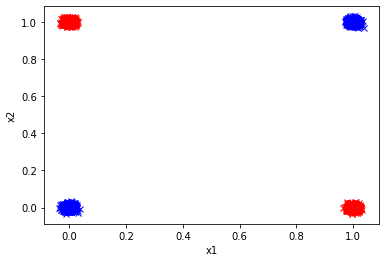

In [46]:
#(iii)T=5000
T = 5000
# we will generate data by adding some gaussian noise around (1,1) (1,0) (0,0) (0,1)

N = int(0.8*T)
M = T-N

df = np.empty((4,0),float)
train = np.empty((4,0),float)
test = np.empty((4,0),float)

mean = np.array([[0,0],[0,1],[1,1],[1,0]])
cov = np.array([[0.0001,0],[0,0.0001]])
for i in range(4):
    temp = np.random.multivariate_normal(mean[i], cov, int(T/4)).T
    l = np.empty((int(T/4)),float)
    l.fill(mean[i][0]^mean[i][1])
    t = np.ones((int(T/4)),float)
    temp = np.append(temp,np.array([t]),axis=0)
    temp = np.append(temp,np.array([l]),axis=0)
    df = np.concatenate((df,temp),axis=1)
df=df.T
#plotting data points with label 1 in red color and label 0 in blue color
for i in range(T):
    if(df[i,3]==1):
        plt.plot(df[i,0], df[i,1],'rx')
    else:
        plt.plot(df[i,0], df[i,1],'bx')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#Splitting the dataset into training and testing samples
train = split_data(df,N)[0]
test = split_data(df,N)[1]

#separating features and labels x->features y->labels
train_x = np.array([train[:,0],train[:,1],train[:,2]]).T
train_y = train[:,3]

test_x = np.array([test[:,0],test[:,1],test[:,2]]).T
test_y = test[:,3]

#Splitting the training data into m 'mini-batches' 
m = 100
n = int(N/m)
batches = mini_batches(train_x,train_y,m)
batch_x = batches[0]            #this contains features of the individual element in each batch
batch_y = batches[1]            #this contains labels of the individual element in each batch

#intialising weights and biases
a1 = np.array([-6.34 ,-7.29  ,2.90 ])
a2 = np.array([-5.99 ,-5.40  , 8.48] )
b = np.array([-10.14 ,  9.92 , -4.90] )

#learning rate
g = 0.05

#lists to store testing losses and training losses after every epoch
test_loss=[]
train_loss=[]
ex=[]
epoches=100

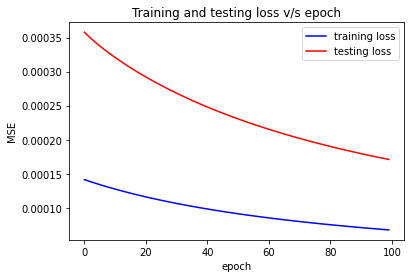

In [47]:
for e in range(epoches):
    for i in range(n):
        X = batch_x[i]
        Y = batch_y[i]

        grad_a1 = np.zeros((3,))
        grad_a2 = np.zeros((3,))
        grad_b = np.zeros((3,))

        for j in range(m):
            x = X[j]
            y = Y[j]
            #output at the hidden layer
            z0 = sig(float(np.dot(a1,x)))
            z1 = sig(float(np.dot(a2,x)))
            z = np.array([z0,z1,1]).T

            #y output
            y_out = sig(float(np.dot(b,z)))

            #delta
            d = -2*(y-y_out)*sig_der(y_out)

            #factors which are required in calculating gradient w.r.t a1 and a2
            s0 = d*b[0]*sig_der(z0)
            s1 = d*b[1]*sig_der(z1)

            #calculating gradients
            grad_b = np.add(grad_b,d*z)
            grad_a1 = np.add(grad_a1,s0*x)
            grad_a2 = np.add(grad_a2,s1*x)
        
        #updating weights using calculated gradients with respect to each vector.
        b = b-g*grad_b
        a1 = a1-g*grad_a1
        a2 = a2-g*grad_a2

    #calculating training and testing errors at the end of every epoch
    y_test_out = predict(test_x,a1,a2,b)
    y_train_out = predict(train_x,a1,a2,b)
    test_loss.append(MSE(test_y,y_test_out))
    train_loss.append(MSE(train_y[:],y_train_out))
    ex.append(e)
    
plt.plot(ex,train_loss,'b',label='training loss')
plt.plot(ex,test_loss,'r',label='testing loss')
plt.title('Training and testing loss v/s epoch')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [48]:
print('Parameters of the model are : \n')
print('a1 (weights and bias at hidden node 1) :')
print(a1,'\n')
print('a2 (weights and bias at hidden node 2) :')
print(a2,'\n')
print('b (weights and bias at output node) :')
print(b,'\n')
print('Few predictions of our model :')
print('XOR(1,0) : ',predict(np.array([1,0,1]),a1,a2,b))
print('XOR(0,0) : ',predict(np.array([0,0,1]),a1,a2,b))
print('XOR(0,1) : ',predict(np.array([0,1,1]),a1,a2,b))
print('XOR(1,1) : ',predict(np.array([1,1,1]),a1,a2,b))

Parameters of the model are : 

a1 (weights and bias at hidden node 1) :
[-6.52406524 -7.42669866  2.99105529] 

a2 (weights and bias at hidden node 2) :
[-6.17415123 -5.56620712  8.74913256] 

b (weights and bias at output node) :
[-10.88801699  10.66282893  -5.27173926] 

Few predictions of our model :
XOR(1,0) :  0.9869707098623193
XOR(0,0) :  0.006841883379926042
XOR(0,1) :  0.992147828258696
XOR(1,1) :  0.008476112309083524
